# Data Sources

https://catalog.data.gov/dataset/allegheny-county-crash-data

https://catalog.data.gov/dataset/allegheny-county-traffic-counts

In [5]:
%matplotlib inline
import pandas as pd
#gmplot used for creating html maps plotting lat/lon on google maps style
import gmplot as gm

In [6]:
crash = pd.read_csv('crashdata.csv')
crash.head()

C:\Users\Ari\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (79,183) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,ACCESS_CTRL,ROADWAY_COUNTY,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME
0,2.004000e+09,11.0,2.0,2454.0,02454,2004.0,1.0,5.0,257.0,2.0,...,3.0,2.0,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD
1,2.004000e+09,11.0,2.0,2440.0,02440,2004.0,1.0,5.0,1027.0,10.0,...,NaN,2.0,2.0,W,3.0,NaN,35.0,NaN,NaN,COAL VALLEY RD
2,2.004000e+09,11.0,2.0,2203.0,02203,2004.0,1.0,5.0,1839.0,18.0,...,NaN,2.0,2.0,W,2.0,3082,35.0,NaN,NaN,CLINTON FRANKFORT RD
3,2.004000e+09,11.0,2.0,2404.0,02404,2004.0,1.0,6.0,914.0,9.0,...,NaN,2.0,2.0,N,4.0,NaN,25.0,NaN,NaN,NORTH BALPH AV
4,2.004000e+09,11.0,2.0,2419.0,02419,2004.0,1.0,5.0,2230.0,22.0,...,NaN,2.0,2.0,S,4.0,NaN,20.0,NaN,NaN,THORNBERRY DR


In [8]:
(crash.iloc[:,183]).head()

0    2032
1     NaN
2    3082
3     NaN
4     NaN
Name: ROUTE, dtype: object

In [9]:
(crash.iloc[:,79]).dropna().head()

37      Y
121     Y
275     Y
604     Y
2450    Y
Name: WZ_FLAGGER, dtype: object

In [65]:
#Attributes of crash df that measure outcomes
crash.FATAL #1/0
crash.FATAL_COUNT
crash.FATAL_OR_MAJ_INJ #1/0 Fatal or Major Injury
crash.INJURY #1/0 Fatality not an injury
crash.INJURY_COUNT #At least 1 person injured/killed
crash.MAJ_INJ_COUNT #Count of major injuries
crash.MAJOR_INJURY #1/0 1+ sustained major injury
crash.MAX_SEVERITY_LEVEL #DD for dictionary
crash[crash.VEHICLE_COUNT == 14][['DEC_LAT', 'DEC_LONG']]

,DEC_LAT,DEC_LONG
137815,40.4231,-79.972504


In [57]:
#Date time attributes of crash df
crash.CRASH_YEAR
crash.CRASH_MONTH
crash.DAY_OF_WEEK
crash.HOUR_OF_DAY
crash.TIME_OF_DAY #Decimal 24-hr

0          257.0
1         1027.0
2         1839.0
3          914.0
4         2230.0
5         1415.0
6         1430.0
7          847.0
8         1244.0
9         1150.0
10        1614.0
11        1920.0
12         422.0
13         801.0
14         945.0
15        9999.0
16        1643.0
17         341.0
18         611.0
19        1240.0
20         902.0
21         900.0
22        1650.0
23        1635.0
24         840.0
25         915.0
26         910.0
27        1505.0
28         547.0
29        1133.0
           ...  
157791    1314.0
157792    1645.0
157793    1720.0
157794     235.0
157795    1802.0
157796    1609.0
157797    1153.0
157798    2241.0
157799    1820.0
157800     804.0
157801    1453.0
157802    1257.0
157803     945.0
157804    2003.0
157805    1505.0
157806    1540.0
157807     552.0
157808    1632.0
157809     544.0
157810     230.0
157811    1902.0
157812    1631.0
157813    1908.0
157814    2054.0
157815    1300.0
157816     102.0
157817    1159.0
157818     514

In [59]:
crash.URBAN_RURAL.value_counts() #1-Rural 3-Urbanized pop. 50K to 200K

3.0    153828
1.0      3993
Name: URBAN_RURAL, dtype: int64

In [ ]:
#Interesting possibly contributing factors to crash
crash.WEATHER #DD for dictionary

# Traffic Sensor Location Plotting

traffic = pd.read_csv('data-trafficcounts.csv')
traffic.head()

In [33]:
sensor_loc = traffic[['Longitude', 'Latitude']]
print(sensor_loc.head())
sensor_loc.shape

   Longitude   Latitude
0 -79.861523  40.625398
1 -79.796409  40.445047
2 -79.820976  40.487624
3 -79.703859  40.443548
4 -80.114273  40.389899


(1305, 2)

In [48]:
sensor_lon = sensor_loc.Longitude.dropna().tolist()
sensor_lat = sensor_loc.Latitude.dropna().tolist()

In [49]:
gmap = gm.GoogleMapPlotter(sensor_lat[0],sensor_lon[0],10)
gmap.scatter(sensor_lat,sensor_lon, color = 'k', marker=False)
gmap.draw("traffic_scatter.html")

# EDA of crash data

In [12]:
crash['FATAL_COUNT'].value_counts()
#Look at fatalities of accidents

0.0    156963
1.0       804
2.0        47
3.0         7
Name: FATAL_COUNT, dtype: int64

In [13]:
crash['HOUR_OF_DAY'].head()

0     2.0
1    10.0
2    18.0
3     9.0
4    22.0
Name: HOUR_OF_DAY, dtype: float64

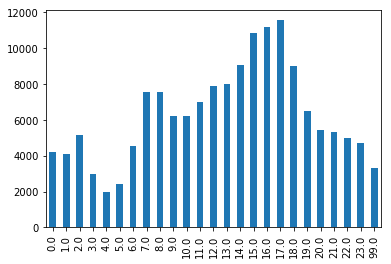

In [14]:
crash['HOUR_OF_DAY'].value_counts().sort_index().plot(kind = 'bar')
#What time of day are accidents most common?

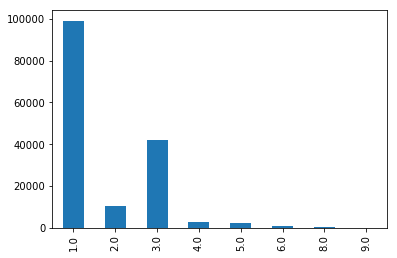

In [15]:
crash['ILLUMINATION'].value_counts().sort_index().plot(kind = 'bar')

In [16]:
light = crash[['HOUR_OF_DAY', 'ILLUMINATION']]
light = light[light['HOUR_OF_DAY'] < 25]
light = light.set_index('HOUR_OF_DAY').sort_index()
light.ILLUMINATION.value_counts()

1.0    97032
3.0    41462
2.0     9957
4.0     2558
5.0     2255
6.0      751
8.0      303
9.0       25
Name: ILLUMINATION, dtype: int64

In [50]:
lat = crash['DEC_LAT'].dropna().head(50).tolist()
lon = crash['DEC_LONG'].dropna().head(50).tolist()

In [51]:
gmap = gm.GoogleMapPlotter(lat[0],lon[0],10)
gmap.scatter(lat,lon, color = 'k', marker=False)
gmap.draw("scatter.html")

In [20]:
#double lat and lon before heatmap
lat = lat + lat
lon = lon + lon

In [21]:
gmap = gm.GoogleMapPlotter(lat[0],lon[0],12) #initialize zoom = 15, 10 fits all data
#gmap.scatter(lat,lon,'#3B0B39', size=4000, marker=False)
#gmap.scatter(lat,lon, 'k', marker=True)

gmap.heatmap(lat,lon)

gmap.draw("mymap.html")